In [257]:
# Logistic Regressioon -------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os as os

In [258]:
os.getcwd()

'/home/johnpaul/Downloads'

In [259]:
def sigmud(h):
    return 1 / (1+np.exp(-h))

def accuracy(y, p):
    return np.mean(y == np.round(p))

def cross_en(y,p,lambda2,w): #error function
    return -(np.sum(y*np.log(p) + (1 - y)*np.log(1 - p)) + lambda2*w.dot(w))

In [260]:
xor = pd.read_csv('xor.csv')

In [261]:
xor1 = xor

In [262]:
# get the dataset
xor1 = np.array(xor)

In [263]:
xor.head(3)

,x1,x2,y
0,1.907567,0.325865,0
1,2.270544,2.258817,0
2,2.323086,1.466601,0


In [264]:
X = xor1[:,:2]

In [265]:
X

array([[ 1.90756726,  0.32586513],
       [ 2.27054368,  2.25881652],
       [ 2.32308573,  1.46660143],
       ...,
       [ 3.0596909 , -2.87353245],
       [ 3.52560718, -2.33106954],
       [ 1.72005898, -1.13464011]])

In [266]:
Y = xor1[:,2]

In [267]:
Y

array([0., 0., 0., ..., 1., 1., 1.])

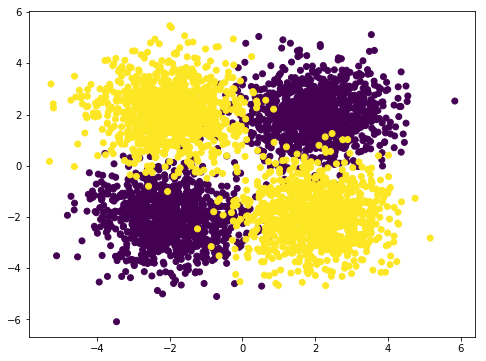

In [268]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y)

In [295]:
PHI = np.vstack((np.ones(len(X)), (1/X[:,0]), (1/X[:,1]), (X[:,0])*(X[:,1]))).T

PHI


array([[ 1.        ,  0.52422791,  3.06875422,  0.62160966],
       [ 1.        ,  0.44042315,  0.44270971,  5.12874156],
       [ 1.        ,  0.43046195,  0.68184851,  3.40704085],
       ...,
       [ 1.        ,  0.3268304 , -0.34800373, -8.79212109],
       [ 1.        ,  0.28363909, -0.42898763, -8.21843551],
       [ 1.        ,  0.58137541, -0.88133673, -1.9516479 ]])

/home/johnpaul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


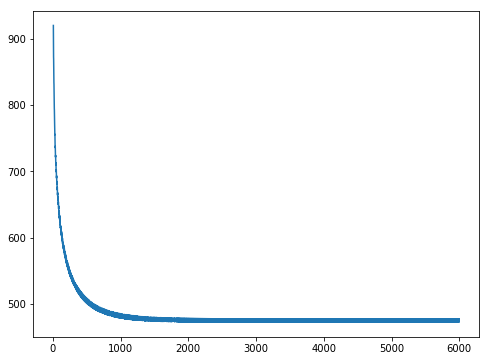

In [324]:
# Gradient Descent

w = np.random.randn(PHI.shape[1])

J = [ ]
eta = 1e-5
epochs = 6000

for i in range(epochs):
    p = sigmud(PHI.dot(w))
    J.append(-y.dot(np.log(p)) - ((1 - y).dot(np.log(1 - p))))
    w -= eta*PHI.T.dot(p - y)

plt.figure(figsize = (8,6))
plt.plot(J)


In [325]:
print('Accuracy {}'.format(accuracy(Y,p)))

Accuracy 0.958


In [310]:
X.shape

(4000, 2)

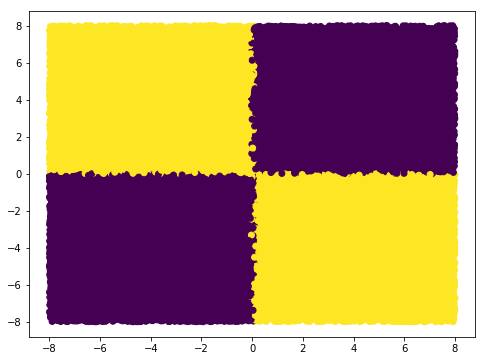

In [332]:
# Visualize the Learned Decision Boundary

X_vis = np.random.uniform(-8, 8, (int(10*X.shape[0]),X.shape[1]))

PHI_vis = np.vstack((np.ones(len(X_vis)), 1/X_vis[:,0], 1/X_vis[:,1], X_vis[:,0])*(X_vis[:,1])).T

p_vis = sigmud(PHI_vis.dot(w))

plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,0], X_vis[:,1], c = np.round(p_vis))



In [331]:
X_vis

array([[-7.37706093, -7.96425771],
       [ 2.94269741,  0.60072889],
       [-4.97514279, -3.73740416],
       ...,
       [ 7.15396699,  2.07449509],
       [ 0.28638597, -7.16841019],
       [ 0.06348182, -5.03289857]])